In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# List all files in a specific directory
!ls "/content/drive/My Drive/ise535/"




Mounted at /content/drive
ADMISSIONS.csv.gz	 D_ITEMS.csv.gz		    OUTPUTEVENTS.csv.gz
CALLOUT.csv.gz		 D_LABITEMS.csv.gz	    PATIENTS.csv
CAREGIVERS.csv.gz	 DRGCODES.csv.gz	    PATIENTS.csv.gz
CHARTEVENTS.csv		 ICUSTAYS.csv.gz	    PRESCRIPTIONS.csv.gz
CPTEVENTS.csv.gz	 INPUTEVENTS_CV.csv.gz	    PROCEDUREEVENTS_MV.csv.gz
DATETIMEEVENTS.csv.gz	 INPUTEVENTS_MV.csv.gz	    PROCEDURES_ICD.csv.gz
D_CPT.csv.gz		 LABEVENTS.csv.gz	    README.md
D_ICD_DIAGNOSES.csv	 LICENSE.txt		    SERVICES.csv.gz
D_ICD_DIAGNOSES.csv.gz	 MICROBIOLOGYEVENTS.csv.gz  SHA256SUMS.txt
D_ICD_PROCEDURES.csv.gz  NOTEEVENTS.csv.gz	    TRANSFERS.csv.gz


In [ ]:
#!pip install dask
#import dask.dataframe as dd

In [ ]:
import random
import os
import gzip
import pandas as pd
import dask.dataframe as dd
import numpy as np


/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


In [ ]:


# Directory where your .gz files are located
directory = '/content/drive/My Drive/ise535/'

# List of specific filenames to process (without .gz extension)
specific_files = ['ADMISSIONS.csv', 'PATIENTS.csv', 'ICUSTAYS.csv', 'CHARTEVENTS.csv','DIAGNOSES_ICD.csv'
,   'LABEVENTS.csv']  # Replace with your specific file names

# Dictionary to store DataFrames with file names as keys
dataframes = {}

# Loop through each file in the directory
for filename in os.listdir(directory):
    if filename.endswith(".gz") and any(specific_file in filename for specific_file in specific_files):
        file_path = os.path.join(directory, filename)

        # Extract the file name without the .gz and .csv extensions
        dataframe_name = os.path.splitext(os.path.splitext(filename)[0])[0]  # Removes ".gz" and ".csv"
        print(f"Processing file: {filename} -> Saving as DataFrame: {dataframe_name}")

        # Read the GZIP file into a pandas DataFrame
        df = dd.read_csv(file_path, compression='gzip')

        # Save the DataFrame in the dictionary with the cleaned filename as the key
        dataframes[dataframe_name] = df

# Now, each DataFrame is stored in the 'dataframes' dictionary with its file name without the ".csv" extension

Processing file: ADMISSIONS.csv.gz -> Saving as DataFrame: ADMISSIONS


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


Processing file: ICUSTAYS.csv.gz -> Saving as DataFrame: ICUSTAYS


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


Processing file: LABEVENTS.csv.gz -> Saving as DataFrame: LABEVENTS


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


Processing file: PATIENTS.csv.gz -> Saving as DataFrame: PATIENTS


/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


In [ ]:
df_DIAGNOSES_ICD = dd.read_csv('/content/drive/My Drive/DIAGNOSES_ICD.csv.gz',
                               compression='gzip',  # Handle the gzipped file
                               dtype={'ROW_ID': 'int64',
                                      'SUBJECT_ID': 'int64',
                                      'HADM_ID': 'int64',
                                      'SEQ_NUM': 'float64',  # Keep as float64 if there are missing values
                                      'ICD9_CODE': 'object'})

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


In [ ]:
df_OUTPUTEVENTS = dd.read_csv(
    '/content/drive/My Drive/ise535/OUTPUTEVENTS.csv.gz',
    compression='gzip',  # Handle gzipped file
    usecols=['VALUE', 'SUBJECT_ID', 'ITEMID'],  # Select only the needed columns
    dtype={'VALUE': 'float64', 'SUBJECT_ID': 'int64', 'ITEMID': 'int64'}  # Set appropriate dtypes
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:555: UserWarning: Warning gzip compression does not support breaking apart files
Please ensure that each individual file can fit in memory and
use the keyword ``blocksize=None to remove this message``
Setting ``blocksize=None``
  warn(


subject_to_exclude

In [ ]:
# Ensure 'ICD9_CODE' is treated as string if needed
df_DIAGNOSES_ICD['ICD9_CODE'] = df_DIAGNOSES_ICD['ICD9_CODE'].astype(str)

# Define the list of ICD9_CODEs to filter
icd9_codes_to_filter = ['5119', '51189', '5180', '5061']

# Filter the Dask DataFrame based on the ICD9_CODE values
filtered_df = df_DIAGNOSES_ICD[df_DIAGNOSES_ICD['ICD9_CODE'].isin(icd9_codes_to_filter)]

# Compute the filtered DataFrame to convert it to a Pandas DataFrame
filtered_df = filtered_df.compute()

# Check if 'SUBJECT_ID' exists and extract unique values into a list
if 'SUBJECT_ID' in filtered_df.columns:
    # Extract unique SUBJECT_IDs
    subject_to_exclude = filtered_df['SUBJECT_ID'].drop_duplicates().tolist()
    print("Subjects to exclude:", subject_to_exclude)
else:
    print("Column 'SUBJECT_ID' does not exist in the DataFrame.")

Subjects to exclude: [115, 75, 88, 17, 21, 36, 43, 177, 307, 161, 163, 148, 156, 105, 225, 263, 269, 477, 452, 339, 353, 354, 356, 367, 357, 330, 414, 423, 594, 530, 663, 700, 711, 505, 507, 544, 546, 548, 557, 755, 849, 852, 690, 695, 619, 728, 731, 738, 745, 747, 771, 785, 808, 794, 945, 976, 984, 1007, 1017, 865, 877, 897, 890, 820, 840, 923, 1148, 914, 1062, 1085, 1042, 1044, 1141, 1344, 1338, 1251, 1252, 1257, 1215, 1222, 1135, 1283, 1295, 1301, 1313, 1325, 1569, 1409, 1427, 1441, 1387, 1399, 1401, 1346, 1546, 1621, 1634, 1579, 1590, 2652, 2665, 2753, 2834, 2924, 1604, 1673, 1675, 1699, 3019, 3021, 3032, 3040, 3064, 2683, 2850, 2852, 2950, 2984, 3002, 3011, 3013, 3393, 3394, 3397, 3266, 3417, 3132, 3133, 3078, 3090, 3092, 3107, 3386, 3242, 3245, 3196, 3214, 3333, 3469, 3145, 3295, 3437, 3165, 3304, 3327, 2689, 2704, 2777, 2616, 2622, 2628, 2790, 3471, 3475, 3508, 3512, 3513, 3371, 1788, 1795, 1973, 2904, 2635, 2809, 2641, 2647, 2740, 1783, 2094, 2111, 2114, 2130, 2136, 2159, 2176,

In [ ]:
# Display all the DataFrame names (keys) in the dataframes dictionary
print("Saved DataFrames:")
for dataframe_name in dataframes.keys():
    print(dataframe_name)


Saved DataFrames:
ADMISSIONS
ICUSTAYS
LABEVENTS
PATIENTS


In [ ]:
# Loop through the dataframes dictionary and assign each DataFrame to a variable
for dataframe_name, df in dataframes.items():
    globals()[f"df_{dataframe_name}"] = df  # Create a variable for each DataFrame

# Verify by printing the names of the newly created DataFrame variables
print("The following DataFrames have been assigned as variables:")
for dataframe_name in dataframes.keys():
    print(f"df_{dataframe_name}")


The following DataFrames have been assigned as variables:
df_ADMISSIONS
df_ICUSTAYS
df_LABEVENTS
df_PATIENTS


In [ ]:
df_ADMISSIONS = df_ADMISSIONS.drop(['DISCHTIME',  'ADMISSION_LOCATION', 'DISCHARGE_LOCATION', 'LANGUAGE', 'RELIGION','EDREGTIME','EDOUTTIME','HOSPITAL_EXPIRE_FLAG',"ROW_ID"], axis=1)
df_ICUSTAYS = df_ICUSTAYS.drop(['ROW_ID','DBSOURCE', 'FIRST_CAREUNIT','LAST_CAREUNIT','FIRST_WARDID','LAST_WARDID','LOS'], axis=1)
df_PATIENTS = df_PATIENTS.drop(['DOD_HOSP','DOD_SSN','EXPIRE_FLAG','ROW_ID'], axis=1)
df_LABEVENTS = df_LABEVENTS.drop(['ROW_ID','HADM_ID', 'CHARTTIME', 'VALUENUM'], axis=1)
# Ensure 'SUBJECT_ID' in df_LABEVENTS matches the type of `subject_to_exclude`
df_LABEVENTS['SUBJECT_ID'] = df_LABEVENTS['SUBJECT_ID'].astype(str)

# Convert subject_to_exclude to strings to match the column type, if necessary
subject_to_exclude = [str(subject) for subject in subject_to_exclude]

# Filter rows directly in Dask to exclude rows where SUBJECT_ID is in subject_to_exclude
df_LABEVENTS = df_LABEVENTS[~df_LABEVENTS['SUBJECT_ID'].isin(subject_to_exclude)]


# If the 'ICD9_CODE' column contains only numeric values, you can convert it too.
# Otherwise, skip or handle non-numeric values appropriately (e.g., filling missing values first).


# Create the 'mortality' column: 1 if DOD is present (not NaN), 0 otherwise
df_PATIENTS['mortality'] = df_PATIENTS['DOD'].isna().map(lambda x: 0 if x else 1)

lab_item_ids = [51006, 50862, 50902, 50885, 50912, 51275, 50813, 50818, 51237, 50809, 50971]

# Filter the LABEVENTS DataFrame for these item IDs
df_LABEVENTS = df_LABEVENTS[df_LABEVENTS['ITEMID'].isin(lab_item_ids)]


# Apply all conditions in one step to ensure that all must be met


In [ ]:
df_LABEVENTS['SUBJECT_ID'].unique().compute()

,SUBJECT_ID
0,3
1,2
2,4
3,6
4,9
...,...
45200,99017
45201,98925
45202,98759
45203,98883


In [ ]:
import pandas as pd

# Step 1: Merge the 'PATIENTS' and 'ADMISSIONS' tables

df = dd.merge(df_ICUSTAYS, df_PATIENTS, on='SUBJECT_ID', how='inner')

# Step 2: Convert 'ADMITTIME' and 'DOB' columns to datetime format
df['OUTTIME'] = dd.to_datetime(df['OUTTIME'], errors='coerce')
df['INTIME'] = dd.to_datetime(df['INTIME'], errors='coerce')

df['icu_stay'] = (df['OUTTIME'] - df['INTIME']).dt.total_seconds()/(60 * 60)
df121 = df[df['icu_stay'] >= 48]
df121.shape[0].compute()

# Extract the list of unique SUBJECT_IDs from df121
subject_ids_list_morethan48hr = df121['SUBJECT_ID'].unique().compute()

# Print or use the list as needed
print(subject_ids_list_morethan48hr)
print(len(subject_ids_list_morethan48hr))



0          268
1          269
2          270
3          271
4          274
         ...  
25844    94937
25845    94944
25846    94950
25847    94954
25848    94956
Name: SUBJECT_ID, Length: 25849, dtype: int64
25849


In [ ]:


# Step 2: Merge the 'ADMISSIONS' and 'PATIENTS' tables on 'SUBJECT_ID', specifying custom suffixes
dd_merged = dd.merge(df_ADMISSIONS, df_PATIENTS, on='SUBJECT_ID', how='inner', suffixes=('_admit', '_patient'))

# Step 3: Ensure 'ADMITTIME' and 'DOB' are in datetime format (use Dask's to_datetime)
dd_merged['ADMITTIME'] = dd.to_datetime(dd_merged['ADMITTIME'], errors='coerce')
dd_merged['DOB'] = dd.to_datetime(dd_merged['DOB'], errors='coerce')

# Step 4: Normalize date to remove the time component
dd_merged['ADMITTIME'] = dd_merged['ADMITTIME'].dt.normalize()
dd_merged['DOB'] = dd_merged['DOB'].dt.normalize()

# Step 5: Extract the year from 'DOB' and 'ADMITTIME'
dd_merged['admit_year'] = dd_merged['ADMITTIME'].dt.year
dd_merged['dob_year'] = dd_merged['DOB'].dt.year

# Step 6: Calculate age
dd_merged['age'] = dd_merged['admit_year'] - dd_merged['dob_year']



# Step 8: Filter data where age >= 18
df111 = dd_merged[dd_merged['age'] >= 18]

# If you want to check the info (like in pandas), you'll need to compute it to see the full DataFrame.
# This step will bring the data into memory.
print(df111.compute().info())

# Extract the list of unique SUBJECT_IDs from df121
subject_ids_list_age = df111['SUBJECT_ID'].unique().compute()

# Print or use the list as needed
print(subject_ids_list_age)

print(len(subject_ids_list_age))

<class 'pandas.core.frame.DataFrame'>
Index: 50796 entries, 0 to 58975
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   SUBJECT_ID            50796 non-null  int64         
 1   HADM_ID               50796 non-null  int64         
 2   ADMITTIME             50796 non-null  datetime64[ns]
 3   DEATHTIME             5781 non-null   string        
 4   ADMISSION_TYPE        50796 non-null  string        
 5   INSURANCE             50796 non-null  string        
 6   MARITAL_STATUS        48451 non-null  string        
 7   ETHNICITY             50796 non-null  string        
 8   DIAGNOSIS             50771 non-null  string        
 9   HAS_CHARTEVENTS_DATA  50796 non-null  int64         
 10  GENDER                50796 non-null  string        
 11  DOB                   50796 non-null  datetime64[ns]
 12  DOD                   22507 non-null  string        
 13  mortality            

chartevent



In [ ]:
# Load the data, make sure to use the correct column names and specify dtypes
df_CHARTEVENTS = dd.read_csv('/content/drive/My Drive/ise535/CHARTEVENTS.csv',
                              usecols=['SUBJECT_ID', 'ITEMID', 'VALUENUM'] +
                                      [col for col in pd.read_csv('/content/drive/My Drive/ise535/CHARTEVENTS.csv', nrows=0).columns
                                       if col not in ['ROW_ID', 'CGID', 'CHARTTIME', 'ERROR',
                                                      'HADM_ID', 'ICUSTAY_ID', 'STORETIME',
                                                      'WARNING', 'VALUE', 'STOPPED', 'RESULTSTATUS',
                                                      'SUBJECT_ID', 'ITEMID']],
                              dtype={'VALUE': 'float64'})  # Specify dtype for 'VALUE' as 'object'

In [ ]:
# List of ITEM_IDs you want to keep
item_ids_to_keep = [227428,223835, 220045, 223761, 224700, 490,226536,225690,220615,227465,227466,220235,225624,227442,226537,225651,227456,778,220277,227242,220180,618]
#item_ids_to_keep = [227428,223835,618, 220045, 220179, 227242, 223762, 224700, 490, 220277, 778]
# Step 1: Filter the DataFrame by ITEM_ID
df_CHARTEVENTS = df_CHARTEVENTS[df_CHARTEVENTS['ITEMID'].isin(item_ids_to_keep)]
# Drop rows where the conditions not meet the criteria of sepsis and ARDS
df_CHARTEVENTSff = df_CHARTEVENTS[
     (
        ((df_CHARTEVENTS['ITEMID'] == 227428) & (df_CHARTEVENTS['VALUENUM'] >= 2)) | #SOFA
        ((df_CHARTEVENTS['ITEMID'] == 223835) & (df_CHARTEVENTS['VALUENUM'] <= 300)) | #FiO2
        ((df_CHARTEVENTS['ITEMID'] == 490) & (df_CHARTEVENTS['VALUENUM'] <= 300))| #PaO2
        ((df_CHARTEVENTS['ITEMID'] == 224700) & (df_CHARTEVENTS['VALUENUM'] >= 5)) #PEEP
    )
]


In [ ]:
subject_ids_chart = df_CHARTEVENTSff['SUBJECT_ID'].unique().compute()

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [ ]:
filtered_subject_ids = list(
    set(subject_ids_list_morethan48hr)
    .intersection(subject_ids_list_age)
    .intersection(subject_ids_chart)
    .difference(subject_to_exclude)  # Exclude SUBJECT_IDs in 'subject_to_exclude'
)

In [ ]:
import random

random_selection = random.sample(filtered_subject_ids, 2000)

# Step 6: Filter the original DataFrame based on the random selection
#df_CHARTEVENTSfinal = df_CHARTEVENTSff[df_CHARTEVENTS['SUBJECT_ID'].isin(random_selection)]
df_CHARTEVENTSfinal = df_CHARTEVENTS[df_CHARTEVENTS['SUBJECT_ID'].isin(filtered_subject_ids)]


In [ ]:
# Convert 'ITEMID' to categorical type before pivoting
df_CHARTEVENTSfinal['ITEMID'] = df_CHARTEVENTSfinal['ITEMID'].astype(str)
df_CHARTEVENTSfinal['ITEMID'] = df_CHARTEVENTSfinal['ITEMID'].astype('category')

# Ensure 'ITEMID' has known categories
df_CHARTEVENTSfinal['ITEMID'] = df_CHARTEVENTSfinal['ITEMID'].cat.as_known() # This line is added to fix the error

# Now perform the pivot operation
pivoted_chartevents = df_CHARTEVENTSfinal.pivot_table(
    index='SUBJECT_ID',
    columns='ITEMID',
    values='VALUENUM',
    aggfunc='mean'  # You can use other functions like 'median' or 'max' if needed
)

/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


OUTPUTEVENTS





In [ ]:
df_OUTPUTEVENTS = df_OUTPUTEVENTS[
     (
        ((df_OUTPUTEVENTS['ITEMID'] == 40055)))]

In [ ]:



# Convert 'ITEMID' to categorical type before pivoting
df_OUTPUTEVENTS['ITEMID'] = df_OUTPUTEVENTS['ITEMID'].astype(str)
df_OUTPUTEVENTS['ITEMID'] = df_OUTPUTEVENTS['ITEMID'].astype('category')

# Ensure 'ITEMID' has known categories
df_OUTPUTEVENTS['ITEMID'] = df_OUTPUTEVENTS['ITEMID'].cat.as_known() # This line is added to fix the error

# Now perform the pivot operation
pivoted_OUTPUTEVENTS = df_OUTPUTEVENTS.pivot_table(
    index='SUBJECT_ID',
    columns='ITEMID',
    values='VALUE',
    aggfunc='mean'  # You can use other functions like 'median' or 'max' if needed
)

In [ ]:
#row_count = df_CHARTEVENTS.shape[0].compute()
# Compute is called on the Dask Series of the number of rows.

#print(f"Total number of rows: {row_count}")

merge

In [ ]:
import dask.dataframe as dd
import pandas as pd





df_CHARTEVENTSfinal['ITEMID'] = df_CHARTEVENTSfinal['ITEMID'].astype('category')
df5 = dd.merge(pivoted_chartevents, df111, on='SUBJECT_ID', how='inner', suffixes=('_df4', '_chartevents'))


df_final = dd.merge(df5, pivoted_OUTPUTEVENTS, on='SUBJECT_ID', how='inner', suffixes=('_df5', '_OUTPUTevents'))


In [ ]:
print("After merge df_final columns:", df_final.columns)

After merge df_final columns: Index(['SUBJECT_ID', '220045', '220180', '220235', '220277', '220615',
       '223761', '223835', '224700', '225624', '225651', '225690', '226536',
       '226537', '227242', '227442', '227456', '227465', '227466', '227428',
       '490', '618', '778', 'HADM_ID', 'ADMITTIME', 'DEATHTIME',
       'ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY',
       'DIAGNOSIS', 'HAS_CHARTEVENTS_DATA', 'GENDER', 'DOB', 'DOD',
       'mortality', 'admit_year', 'dob_year', 'age', '40055'],
      dtype='object')


In [ ]:
#print(df_LABEVENTS.npartitions)

In [ ]:
df_final = df_final.drop(['ADMITTIME','DIAGNOSIS', 'HAS_CHARTEVENTS_DATA', 'admit_year', 'dob_year','DOB', 'DOD', 'DEATHTIME','HADM_ID', '227428'], axis=1)
print(df_final.columns)

Index(['SUBJECT_ID', '220045', '220180', '220235', '220277', '220615',
       '223761', '223835', '224700', '225624', '225651', '225690', '226536',
       '226537', '227242', '227442', '227456', '227465', '227466', '490',
       '618', '778', 'ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS',
       'ETHNICITY', 'GENDER', 'mortality', 'age', '40055'],
      dtype='object')


In [ ]:
# List of columns that should be treated as categorical
categorical_columns = ['ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER', 'mortality']

# Convert the specified columns to 'category' data type in Dask
for col in categorical_columns:
    df_final[col] = df_final[col].astype('category')


In [ ]:
print(df_final.dtypes)


SUBJECT_ID           int64
220045             float64
220180             float64
220235             float64
220277             float64
220615             float64
223761             float64
223835             float64
224700             float64
225624             float64
225651             float64
225690             float64
226536             float64
226537             float64
227242             float64
227442             float64
227456             float64
227465             float64
227466             float64
490                float64
618                float64
778                float64
ADMISSION_TYPE    category
INSURANCE         category
MARITAL_STATUS    category
ETHNICITY         category
GENDER            category
mortality         category
age                  int32
40055              float64
dtype: object


compute

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Step 1: Convert Dask DataFrame to Pandas DataFrame (if not already done)
df_combined_compu = df_final.compute()





/usr/local/lib/python3.10/dist-packages/dask/dataframe/io/csv.py:195: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = reader(bio, **kwargs)


In [ ]:
df_combined_computed=df_combined_compu

In [ ]:
df_combined_computed.shape[0]

3611

In [ ]:
df_combined_computed.isnull().sum()

,0
SUBJECT_ID,0
220045,676
220180,688
220235,908
220277,678
220615,597
223761,680
223835,708
224700,1965
225624,597


In [ ]:
df_combined_computed = df_combined_computed.drop(columns=['227242','490','225651','SUBJECT_ID','226536'])

rename

In [ ]:
df_combined_computed.columns

Index(['220045', '220180', '220235', '220277', '220615', '223761', '223835',
       '224700', '225624', '225690', '226537', '227442', '227456', '227465',
       '227466', '618', '778', 'ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS',
       'ETHNICITY', 'GENDER', 'mortality', 'age', '40055'],
      dtype='object')

In [ ]:
# Define a dictionary with current column names as keys and new names as values
rename_dict = {
    '220045': 'HeartRate',
    '220180': 'NonInvasiveBloodPressureSys',
    '220235': 'PCO2',
    '220277': 'SpO2',
    '220615': 'Creatinine',
    '223761': 'TemperatureF',
    '223835': 'FiO2',
    '224700': 'Total PEEP Level',
    '225624': 'BUN',
    '225690': 'Bilirubin',
    '226537': 'Glucose',
    '227442': 'Potassium',
    '227456': 'Albumin',
    '227465': 'PT',
    '227466': 'PTT',
    '618': 'Respiratory Rate',
    '778': 'Arterial PaCO2',
    'ADMISSION_TYPE': 'ADMISSION_TYPE',
    'INSURANCE': 'INSURANCE',
    'MARITAL_STATUS': 'MARITAL_STATUS',
    'ETHNICITY': 'ETHNICITY',
    'GENDER': 'GENDER',
    'mortality': 'mortality',
    'age': 'age',
    '40055': 'UrineOutput'  # Example of a new name for 40055
}

# Rename the columns in the DataFrame
df_combined_computed.rename(columns=rename_dict, inplace=True)

# Display the updated DataFrame's columns
print(df_combined_computed.columns)


Index(['HeartRate', 'NonInvasiveBloodPressureSys', 'PCO2', 'SpO2',
       'Creatinine', 'TemperatureF', 'FiO2', 'Total PEEP Level', 'BUN',
       'Bilirubin', 'Glucose', 'Potassium', 'Albumin', 'PT', 'PTT',
       'Respiratory Rate', 'Arterial PaCO2', 'ADMISSION_TYPE', 'INSURANCE',
       'MARITAL_STATUS', 'ETHNICITY', 'GENDER', 'mortality', 'age',
       'UrineOutput'],
      dtype='object')


data overview

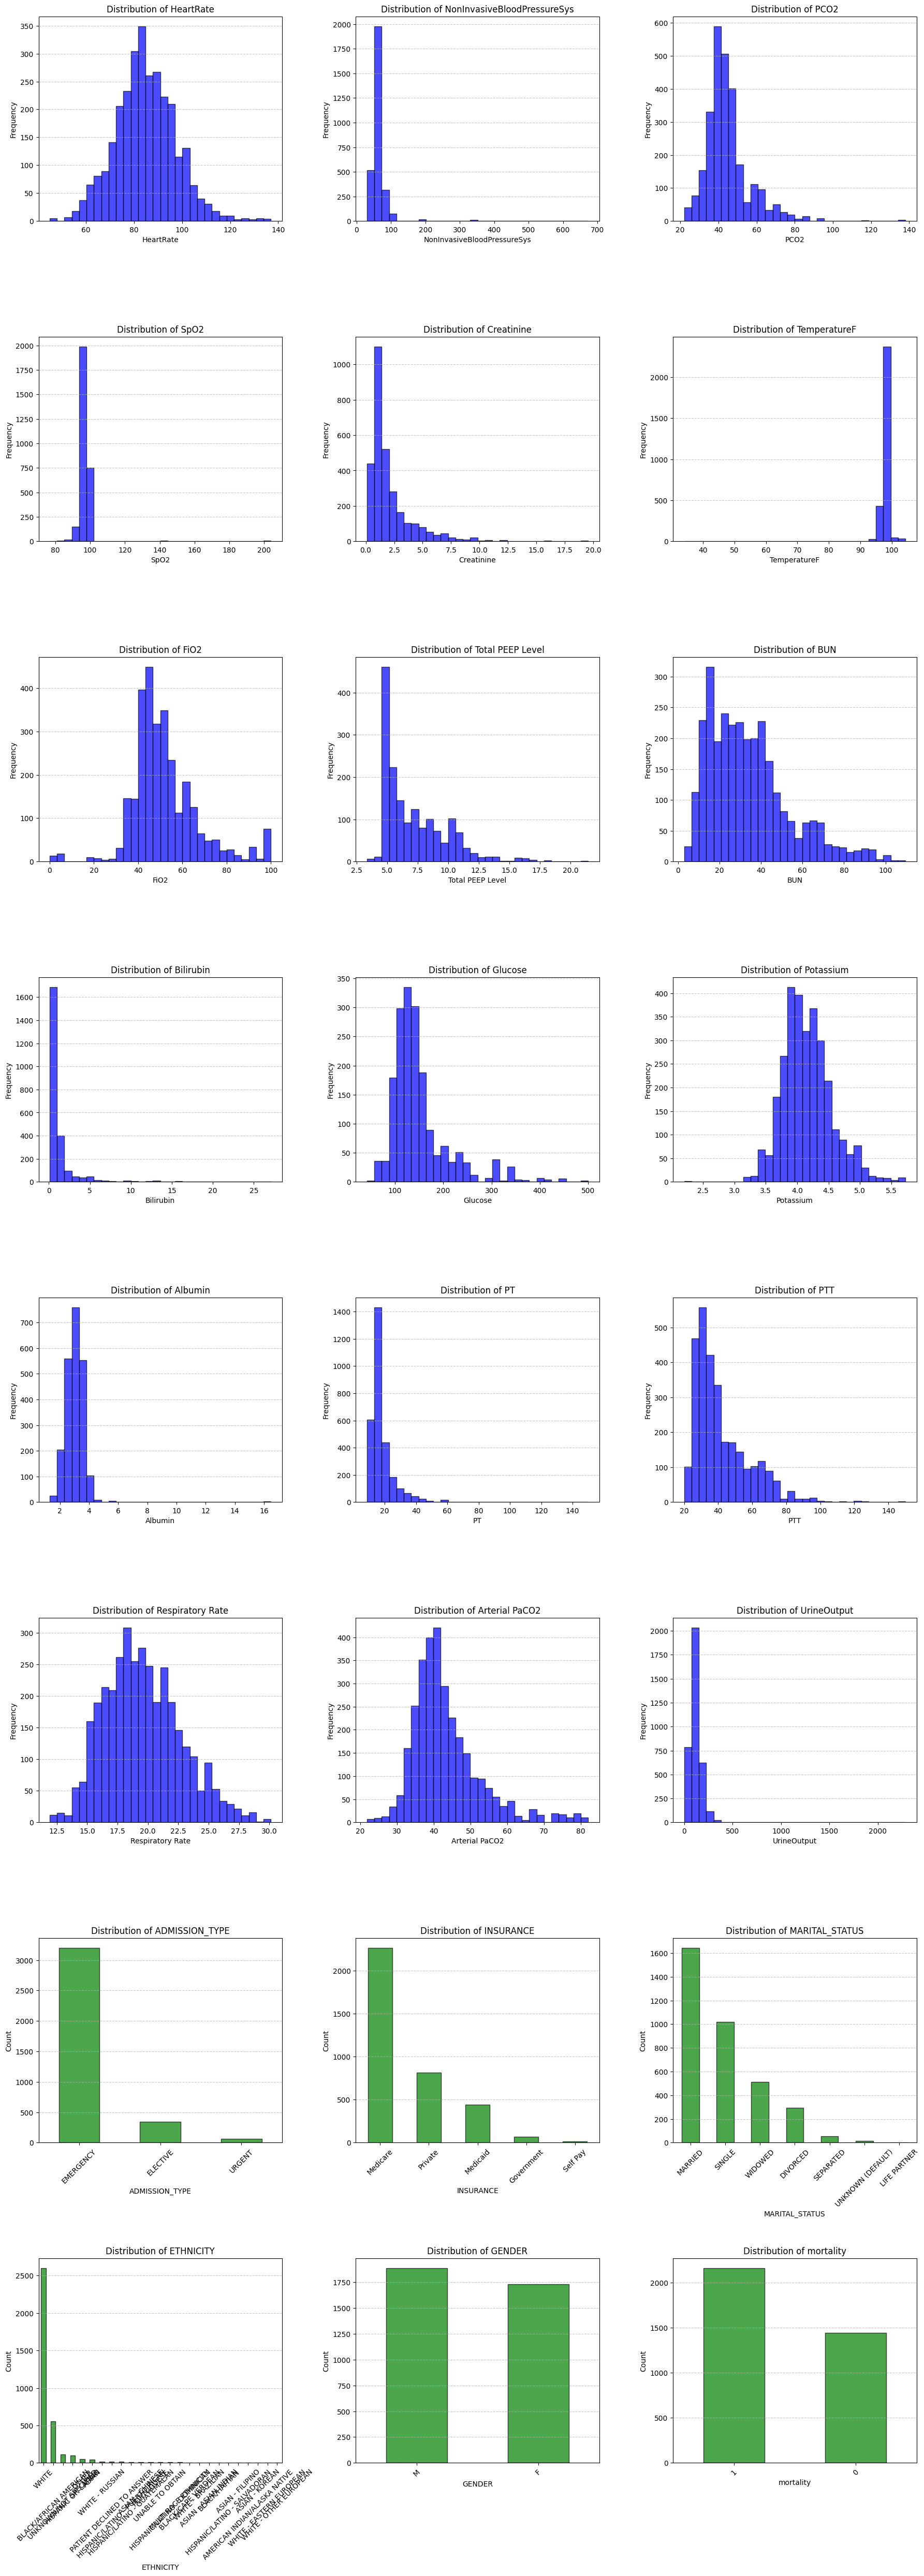

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Example data structure: Replace this with the actual dataset
# df_combined_computed = pd.read_csv('your_dataset.csv')

# Define numerical and categorical features
numerical_columns = df_combined_computed.select_dtypes(include=['float64', 'int64']).columns
categorical_columns = df_combined_computed.select_dtypes(include=['object', 'category']).columns

# Set up the figure for combined graphs
num_features = len(numerical_columns) + len(categorical_columns)
rows = (num_features // 3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 6))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot numerical features
for i, col in enumerate(numerical_columns):
    axes[i].hist(df_combined_computed[col].dropna(), bins=30, alpha=0.7, color='blue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel(col, fontsize=10)
    axes[i].set_ylabel('Frequency', fontsize=10)
    axes[i].grid(axis='y', linestyle='--', alpha=0.7)

# Plot categorical features
offset = len(numerical_columns)
for j, col in enumerate(categorical_columns):
    idx = j + offset
    df_combined_computed[col].value_counts().plot(
        kind='bar', alpha=0.7, color='green', edgecolor='black', ax=axes[idx])
    axes[idx].set_title(f'Distribution of {col}', fontsize=12)
    axes[idx].set_xlabel(col, fontsize=10)
    axes[idx].set_ylabel('Count', fontsize=10)
    axes[idx].grid(axis='y', linestyle='--', alpha=0.7)
    axes[idx].tick_params(axis='x', rotation=45)

# Hide unused subplots
for k in range(len(numerical_columns) + len(categorical_columns), len(axes)):
    fig.delaxes(axes[k])

# Adjust layout
plt.tight_layout()
plt.show()


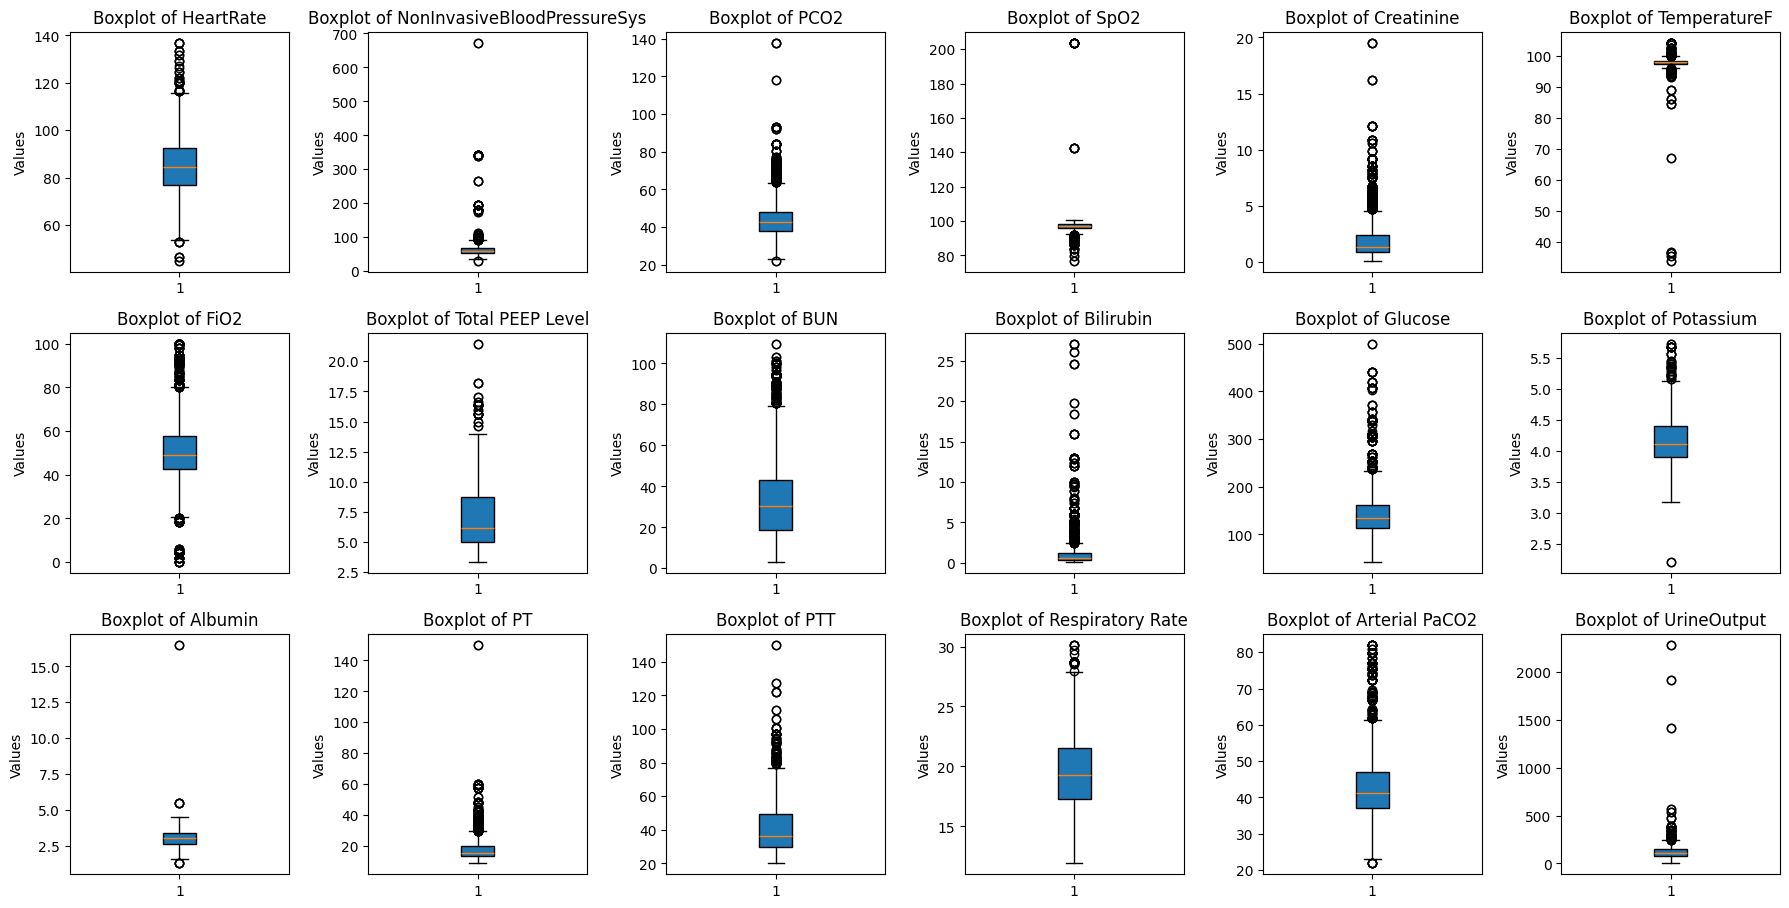

In [ ]:
# Create individual boxplots for each numerical feature and combine them into one figure

# Define numerical features
numerical_columns = df_combined_computed.select_dtypes(include=['float64', 'int64']).columns

# Set up the figure for combined boxplots
num_features = len(numerical_columns)
rows = (num_features // 3) + 1
fig, axes = plt.subplots(rows, 6, figsize=(18, rows * 3))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each numerical feature
for i, col in enumerate(numerical_columns):
    axes[i].boxplot(df_combined_computed[col].dropna(), vert=True, patch_artist=True)
    axes[i].set_title(f'Boxplot of {col}', fontsize=12)
    axes[i].set_ylabel('Values', fontsize=10)

# Hide unused subplots
for j in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()



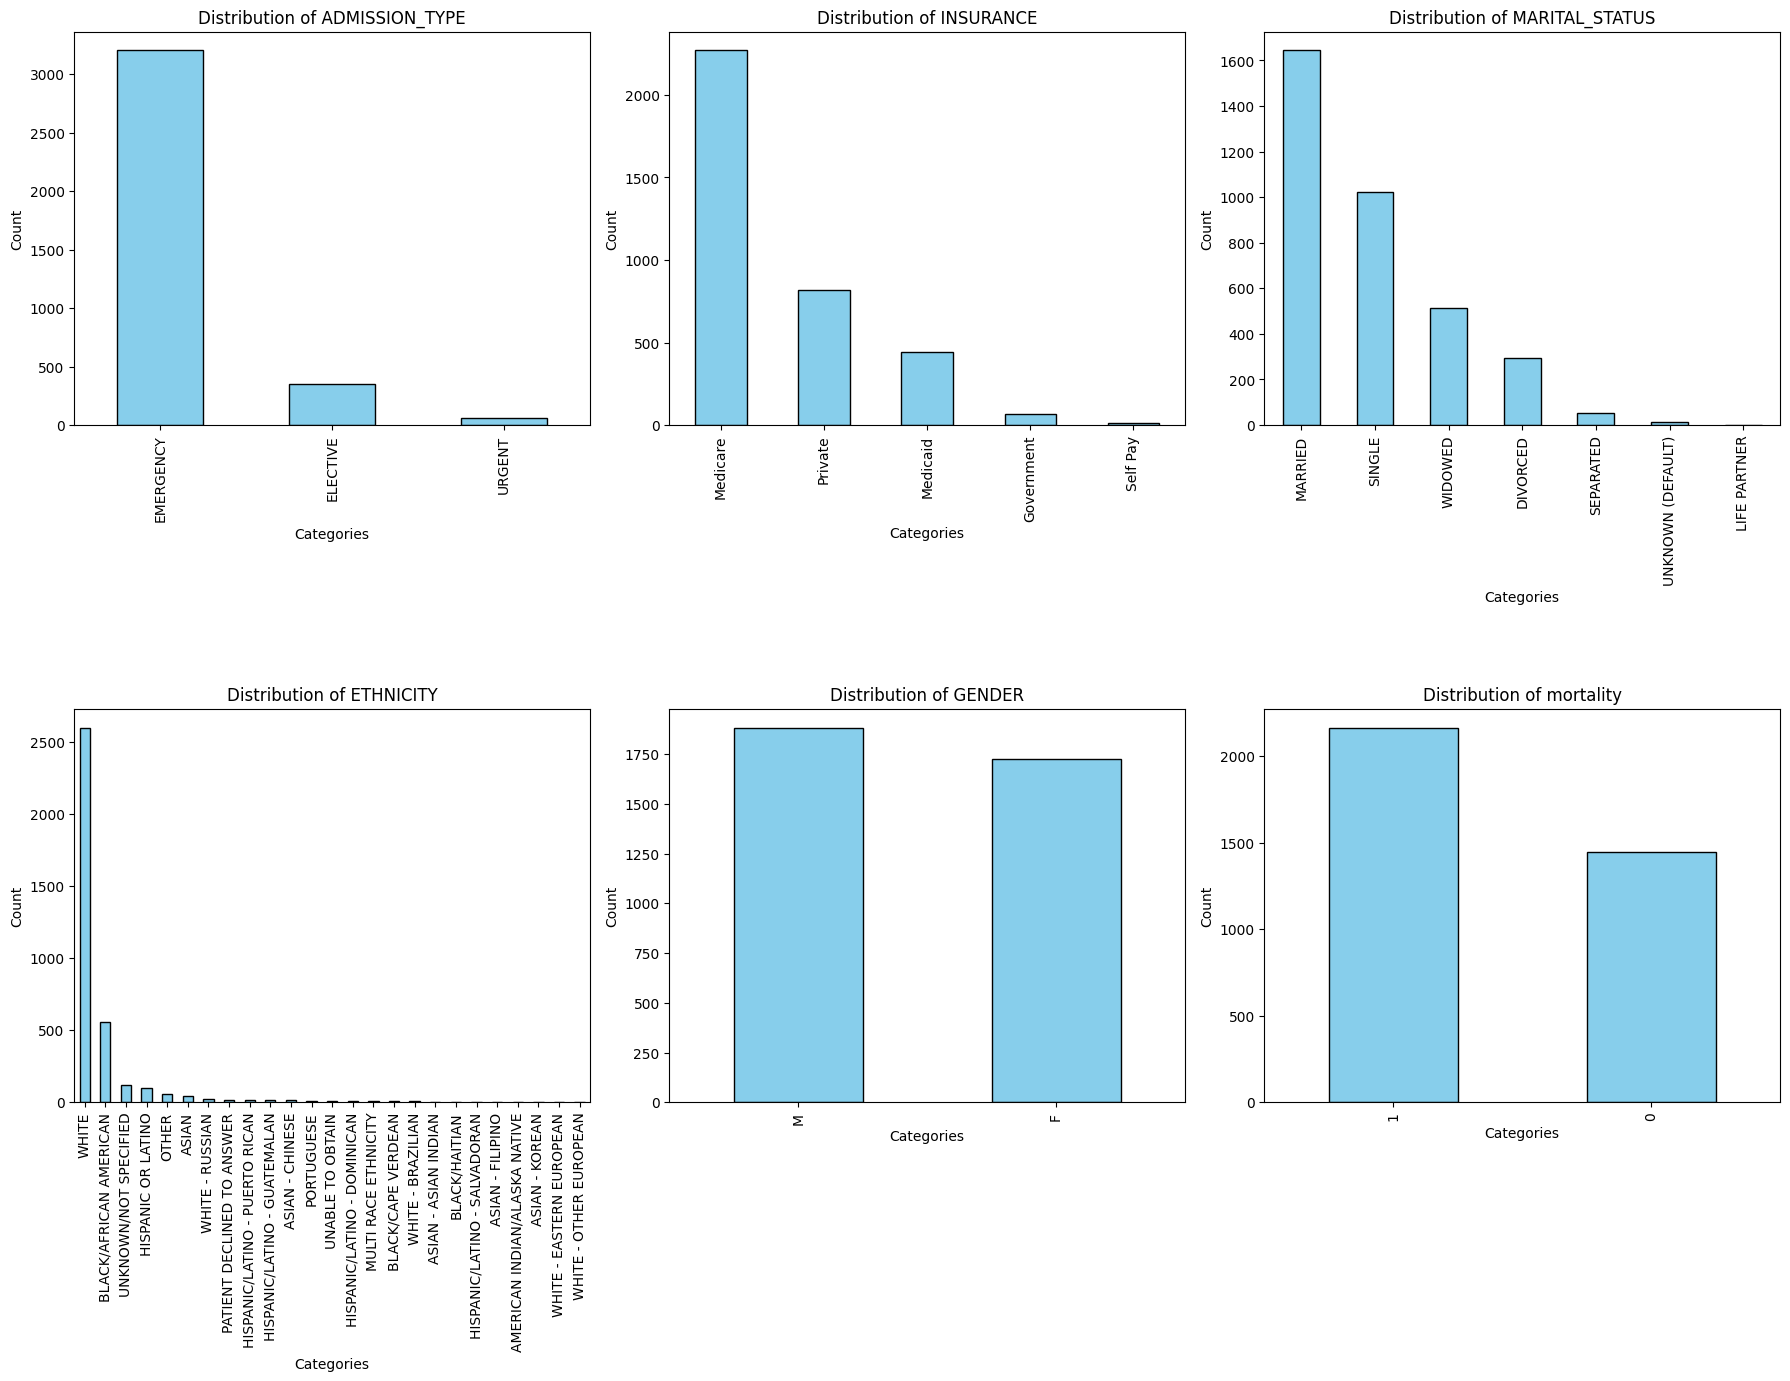

In [ ]:
# Create combined bar charts for all categorical columns

# Define categorical features
categorical_columns = df_combined_computed.select_dtypes(include=['object', 'category']).columns

# Set up the figure for combined bar charts
num_features = len(categorical_columns)
rows = (num_features // 3) + 1
fig, axes = plt.subplots(rows, 3, figsize=(18, rows * 6))

# Flatten axes for easier indexing
axes = axes.flatten()

# Plot each categorical feature
for i, col in enumerate(categorical_columns):
    df_combined_computed[col].value_counts().plot(
        kind='bar', ax=axes[i], color='skyblue', edgecolor='black')
    axes[i].set_title(f'Distribution of {col}', fontsize=12)
    axes[i].set_xlabel('Categories', fontsize=10)
    axes[i].set_ylabel('Count', fontsize=10)
    axes[i].tick_params(axis='x', rotation=90)

# Hide unused subplots
for j in range(len(categorical_columns), len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


split

In [ ]:
# Step 2: Separate features (X) and target (y) variable 'mortality'
X = df_combined_computed.drop(['mortality'], axis=1)  # Features
y = df_combined_computed['mortality']  # Target variable


t test

In [ ]:
from scipy.stats import ttest_ind
import pandas as pd

# Filter numeric columns in X
X_numeric = X.select_dtypes(include=['number'])

# Initialize a dictionary to store p-values for each feature
p_values = {}

# Perform t-tests for each numeric feature
for feature in X_numeric.columns:
    group1 = X_numeric[y == 0][feature].dropna()  # Group where target = 0
    group2 = X_numeric[y == 1][feature].dropna()  # Group where target = 1

    # Perform t-test
    t_stat, p_value = ttest_ind(group1, group2, equal_var=False)  # Welch's t-test
    p_values[feature] = p_value

# Convert p-values dictionary to a DataFrame
p_values_df = pd.DataFrame.from_dict(p_values, orient='index', columns=['p_value'])

# Sort features by p-value in ascending order
p_values_df = p_values_df.sort_values(by='p_value')

# Display the p-values using pandas display function
display(p_values_df) # Changed to display the dataframe using pandas directly.
#print(p_values_df) # You could also use print

,p_value
age,1.482622e-34
BUN,2.752305e-32
PT,2.863737e-24
PTT,2.149685e-17
Albumin,1.120978e-15
Bilirubin,9.542120e-15
UrineOutput,4.543888e-13
TemperatureF,3.126727e-11
Potassium,2.376496e-10
NonInvasiveBloodPressureSys,2.975166e-08


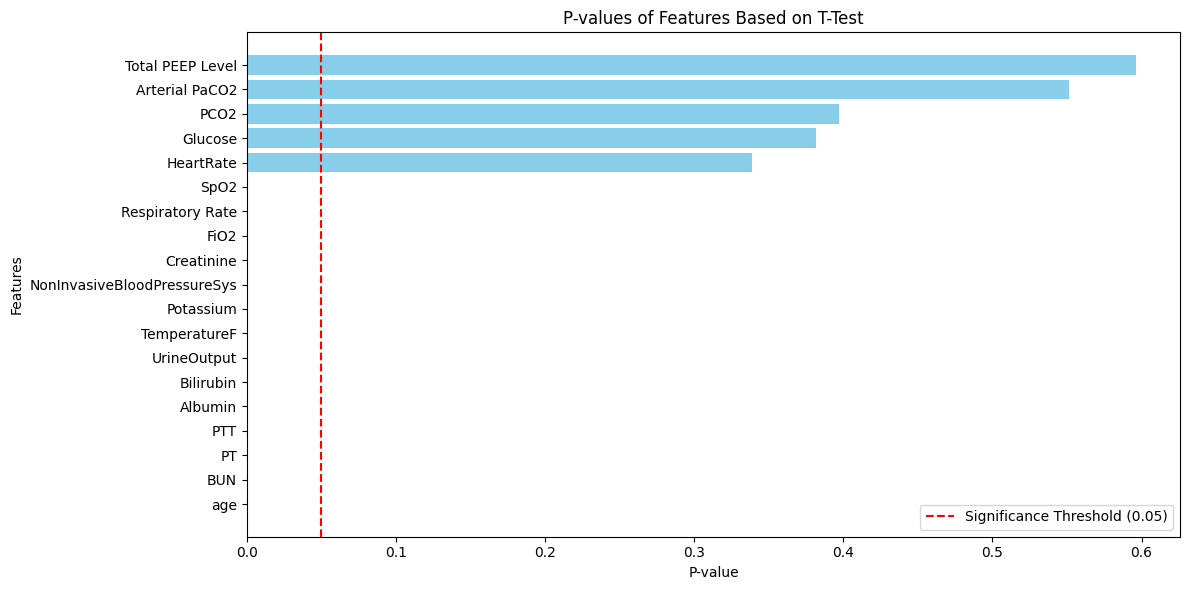

In [ ]:
import matplotlib.pyplot as plt

# Plot the sorted p-values
plt.figure(figsize=(12, 6))
plt.barh(p_values_df.index, p_values_df['p_value'], color='skyblue')
plt.axvline(x=0.05, color='red', linestyle='--', label='Significance Threshold (0.05)')
plt.xlabel('P-value')
plt.ylabel('Features')
plt.title('P-values of Features Based on T-Test')
plt.legend()
plt.tight_layout()
plt.show()


chi square test

In [ ]:
from scipy.stats import chi2_contingency
import pandas as pd

# List of categorical features
categorical_features = ['ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER']

# Initialize a dictionary to store p-values
chi2_p_values = {}

# Perform Chi-square test for each categorical feature
for feature in categorical_features:
    # Create a contingency table
    contingency_table = pd.crosstab(X[feature], y)

    # Perform Chi-square test
    chi2_stat, p_value, dof, expected = chi2_contingency(contingency_table)
    chi2_p_values[feature] = p_value

# Convert p-values dictionary to a DataFrame
chi2_p_values_df = pd.DataFrame.from_dict(chi2_p_values, orient='index', columns=['p_value'])

# Sort features by p-value in ascending order
chi2_p_values_df = chi2_p_values_df.sort_values(by='p_value')

# Display the p-values
print("Chi-Square Test Results for Categorical Features:")
display(chi2_p_values_df)

Chi-Square Test Results for Categorical Features:


,p_value
INSURANCE,1.612213e-31
MARITAL_STATUS,2.500083e-15
ETHNICITY,3.556764e-08
ADMISSION_TYPE,1.273438e-05
GENDER,7.619190e-01


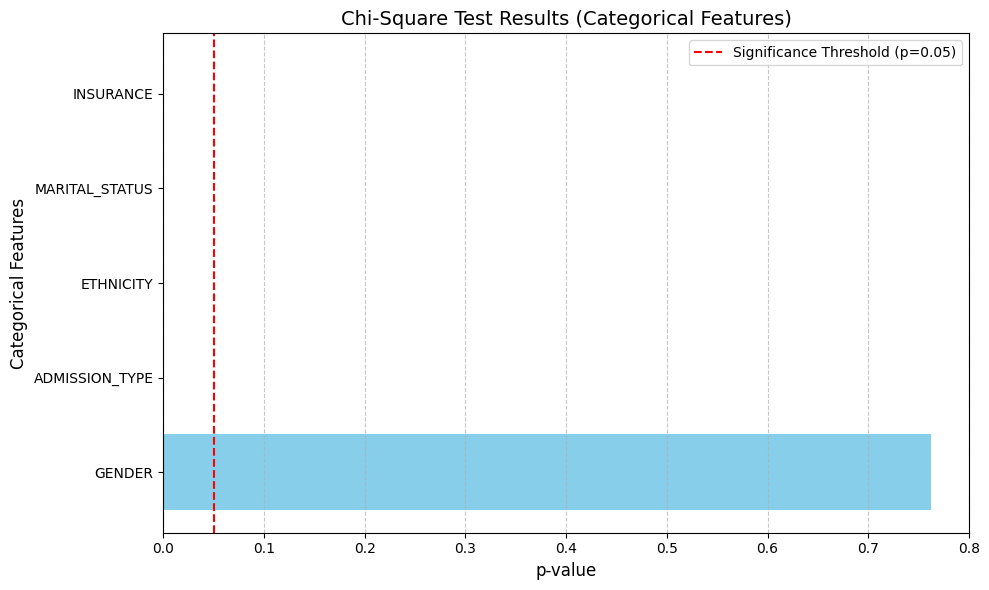

In [ ]:
import matplotlib.pyplot as plt

# Plotting the p-values as a bar chart for visualization
def plot_p_values(chi2_p_values_df):
    plt.figure(figsize=(10, 6))
    plt.barh(chi2_p_values_df.index, chi2_p_values_df['p_value'], color='skyblue')
    plt.axvline(0.05, color='red', linestyle='--', label='Significance Threshold (p=0.05)')
    plt.xlabel('p-value', fontsize=12)
    plt.ylabel('Categorical Features', fontsize=12)
    plt.title('Chi-Square Test Results (Categorical Features)', fontsize=14)
    plt.gca().invert_yaxis()  # Invert y-axis for better readability
    plt.legend()
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Assume chi2_p_values_df is already computed
# chi2_p_values_df = (Output of chi-square test as a dataframe)

# Example plotting using the chi2_p_values_df
plot_p_values(chi2_p_values_df)

In [ ]:
df_combined_computed['mortality'].value_counts()

,count
mortality,
1,2164
0,1447


correlation

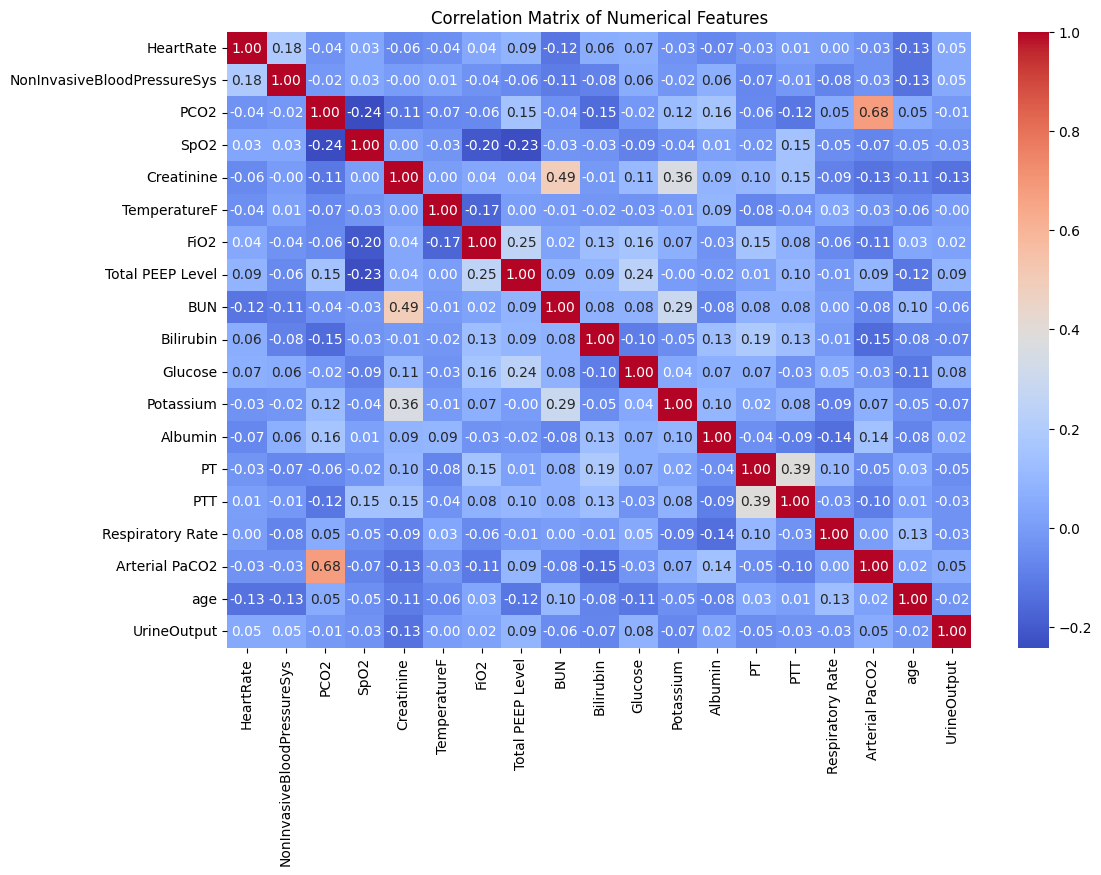

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df_combined_computed is already loaded and preprocessed

# Step 1: Identify and handle categorical columns if necessary
 # Adjust based on your data
#numerical_df = df_combined_computed.drop(categorical_columns, axis=1)  # Drop categorical columns for correlation
numerical_df = df_combined_computed.drop(categorical_columns, axis=1)
# Step 2: Compute the correlation matrix
correlation_matrix = numerical_df.corr()

# Step 3: Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix of Numerical Features')
plt.show()


data preprocess

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import train_test_split

# Step 1: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Separate categorical and numerical columns
categorical_columns = ['ADMISSION_TYPE', 'INSURANCE', 'MARITAL_STATUS', 'ETHNICITY', 'GENDER']
numerical_columns = X.select_dtypes(include=['float64', 'int64']).columns

# Check for NaN values before imputation
print("Missing values in training data before imputation:")
print(X_train[numerical_columns].isnull().sum())  # Numerical columns
print(X_train[categorical_columns].isnull().sum())  # Categorical columns

print("Missing values in testing data before imputation:")
print(X_test[numerical_columns].isnull().sum())  # Numerical columns
print(X_test[categorical_columns].isnull().sum())  # Categorical columns

# Step 3: Manually fill missing values for numerical and categorical columns
# For numerical columns in training, fill NaN with the median
X_train[numerical_columns] = X_train[numerical_columns].fillna(X_train[numerical_columns].median())
X_test[numerical_columns] = X_test[numerical_columns].fillna(X_train[numerical_columns].median())  # Use training median

# For categorical columns in training, fill NaN with mode
for col in categorical_columns:
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])
    X_test[col] = X_test[col].fillna(X_train[col].mode()[0])  # Use training mode

# Check for NaNs after imputation
print("Missing values in training data after imputation:")
print(X_train[numerical_columns].isnull().sum())
print(X_train[categorical_columns].isnull().sum())

print("Missing values in testing data after imputation:")
print(X_test[numerical_columns].isnull().sum())
print(X_test[categorical_columns].isnull().sum())

# Step 4: Apply OneHotEncoder to categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore')  # Handle unknown categories

# Fit on training data, transform both training and testing data
X_train_encoded_categorical = encoder.fit_transform(X_train[categorical_columns])
X_test_encoded_categorical = encoder.transform(X_test[categorical_columns])

# Step 5: Apply StandardScaler to numerical columns
scaler = StandardScaler()

# Fit on training data, transform both training and testing data
X_train_scaled_numerical = scaler.fit_transform(X_train[numerical_columns])
X_test_scaled_numerical = scaler.transform(X_test[numerical_columns])

# Step 6: Combine numerical and encoded categorical data
X_train = np.hstack((X_train_scaled_numerical, X_train_encoded_categorical))
X_test = np.hstack((X_test_scaled_numerical, X_test_encoded_categorical))

# Check shapes to ensure correctness
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)

# Step 7: Convert the target variable y into numerical format using LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform y_train and transform y_test
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)

# Check for NaNs in the training data after the split
print("NaNs in X_train after splitting and preprocessing:", np.isnan(X_train).sum())
print("NaNs in X_test after splitting and preprocessing:", np.isnan(X_test).sum())


Missing values in training data before imputation:
HeartRate                       542
NonInvasiveBloodPressureSys     553
PCO2                            722
SpO2                            544
Creatinine                      477
TemperatureF                    546
FiO2                            563
Total PEEP Level               1570
BUN                             477
Bilirubin                       966
Glucose                        1453
Potassium                       477
Albumin                        1112
PT                              548
PTT                             550
Respiratory Rate                 21
Arterial PaCO2                  400
UrineOutput                       9
dtype: int64
ADMISSION_TYPE     0
INSURANCE          0
MARITAL_STATUS    52
ETHNICITY          0
GENDER             0
dtype: int64
Missing values in testing data before imputation:
HeartRate                      134
NonInvasiveBloodPressureSys    135
PCO2                           186
SpO2           

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:242: UserWarning: Found unknown categories in columns [3] during transform. These unknown categories will be encoded as all zeros
  warnings.warn(


model dnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the model architecture
model = Sequential([
    Dense(512, activation='relu', input_shape=(X_train.shape[1],)),  # Input layer
    BatchNormalization(),
    Dropout(0.4),

    Dense(256, activation='relu'),  # Hidden layers
    BatchNormalization(),
    Dropout(0.3),

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.0005),  # Adam optimizer with custom learning rate
    loss='binary_crossentropy',           # Binary cross-entropy for classification
    metrics=['accuracy', 'AUC']           # Include AUC for evaluation
)

# Summary of the model
model.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_6 (Dense)                      │ (None, 512)                 │          28,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 512)                 │           2,048 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_5 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_6                │ (None, 256)                 │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_7                │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 206,721 (807.50 KB)

 Trainable params: 204,737 (799.75 KB)

 Non-trainable params: 1,984 (7.75 KB)

In [ ]:
# Train the model with NumPy arrays

# Train the model with NumPy arrays

history = model.fit(
    X_train,  # Training data with scaled numerical and encoded categorical features
    y_train,
    validation_data=(X_test, y_test),  # Validation data should also be preprocessed
    epochs=20,
    batch_size=32
)


Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 9s 13ms/step - AUC: 0.5584 - accuracy: 0.5456 - loss: 0.7938 - val_AUC: 0.6859 - val_accuracy: 0.6113 - val_loss: 0.6594
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.6407 - accuracy: 0.6149 - loss: 0.6953 - val_AUC: 0.6955 - val_accuracy: 0.6183 - val_loss: 0.6412
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - AUC: 0.6813 - accuracy: 0.6453 - loss: 0.6506 - val_AUC: 0.7354 - val_accuracy: 0.6418 - val_loss: 0.6159
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7374 - accuracy: 0.6795 - loss: 0.5939 - val_AUC: 0.7867 - val_accuracy: 0.6971 - val_loss: 0.5709
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7439 - accuracy: 0.6967 - loss: 0.5921 - val_AUC: 0.8089 - val_accuracy: 0.7441 - val_loss: 0.5410
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - AUC: 0.7579 - accuracy: 0.7107 - loss: 0.5699 - val_AUC: 0.8264 - val_accuracy: 0.7552 - val_loss: 0.5186
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step -

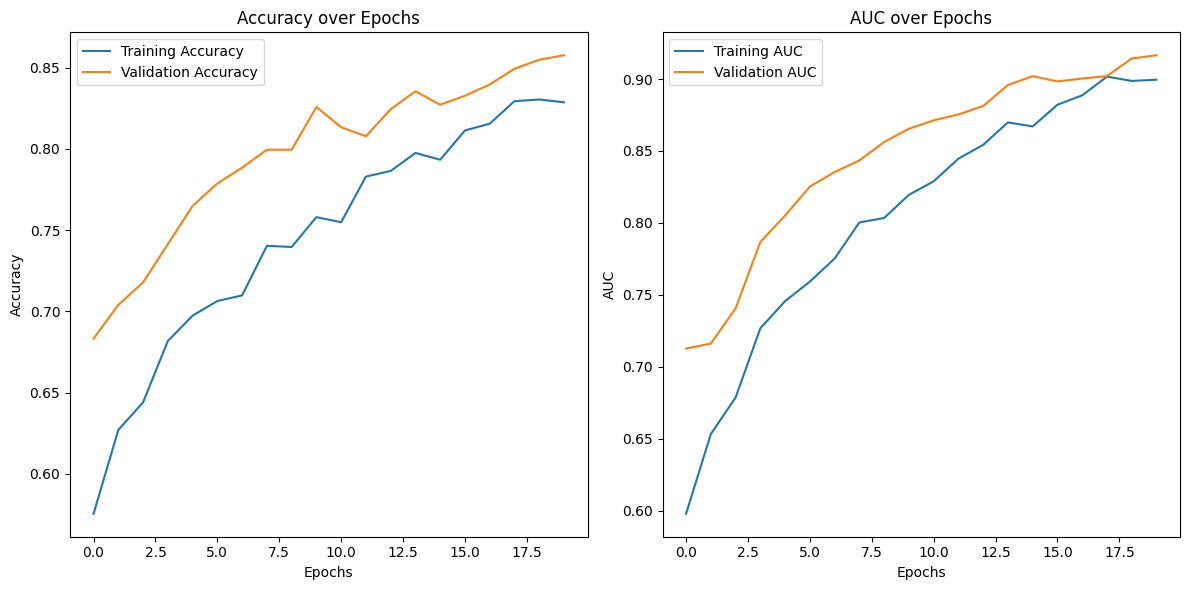

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history from model.fit()

# Plot Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# AUC Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Training AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_probs = model.predict(X_test).ravel()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)




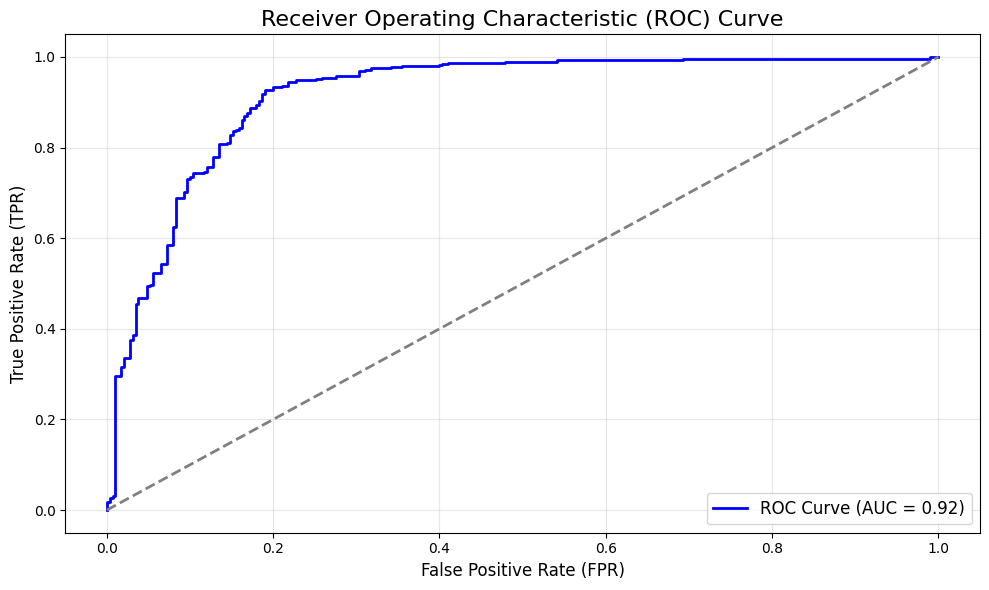

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


sharp analysis

In [ ]:
!pip install shap


In [ ]:
# Convert to NumPy if necessary
X_train_np = X_train.astype('float32')
X_test_np = X_test.astype('float32')


In [ ]:
import shap

# Create SHAP DeepExplainer
explainer = shap.DeepExplainer(model, X_train_np[:1000])  # Use a subset of training data for efficiency

# Compute SHAP values for the test data
shap_values = explainer.shap_values(X_test_np)




/usr/local/lib/python3.10/dist-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")


In [ ]:
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
all_feature_names = list(X[numerical_columns]) + list(encoded_feature_names)
all_feature_names

In [ ]:
print(f"Number of features in X_test_np: {X_test_np.shape[1]}")
print(f"Number of feature names: {len(all_feature_names)}")


Number of features in X_test_np: 55
Number of feature names: 55


Updated SHAP Values Shape: (723, 55)


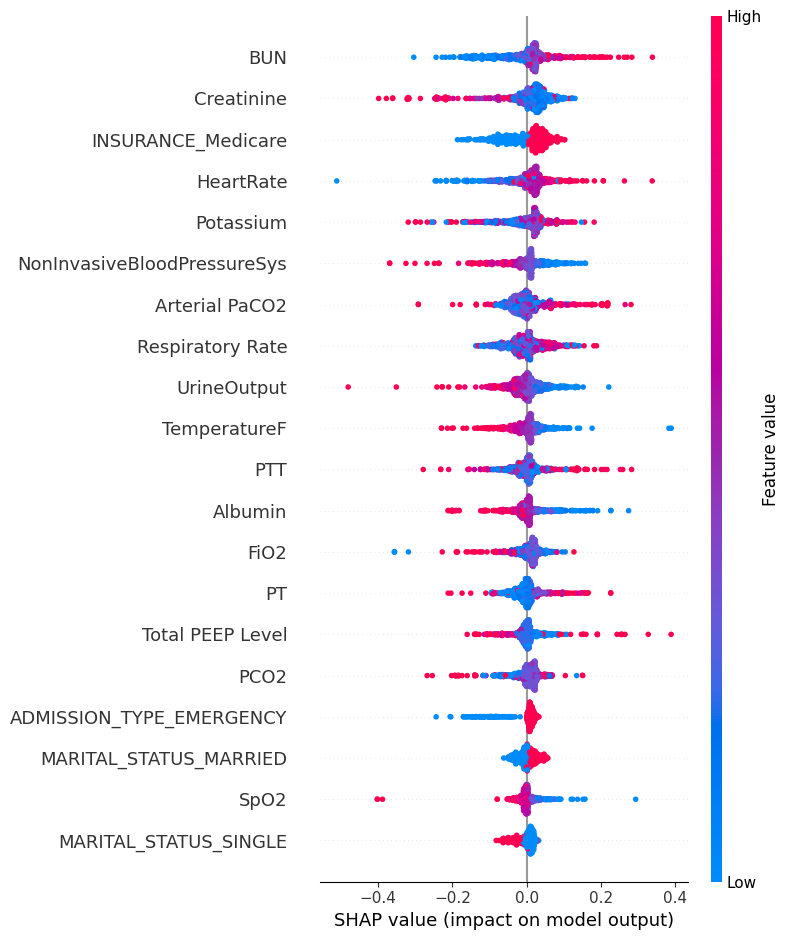

In [ ]:

shap_values = shap_values.squeeze()  # Remove the extra dimension
print("Updated SHAP Values Shape:", shap_values.shape)

# Reshape or select a subset of X_test_np to match the number of features in shap_values
X_test_np_reshaped = X_test_np[:, :shap_values.shape[1]]  # Select relevant features


# Update SHAP summary plot to use these names
shap.summary_plot(shap_values, X_test_np, feature_names=all_feature_names)



ablation analysis

In [ ]:
baseline_performance = model.evaluate(X_test, y_test, verbose=0)
print(f"Baseline Performance: {baseline_performance}")
# Output: [Loss, Accuracy, AUC]


Baseline Performance: [0.3370988667011261, 0.8561549186706543, 0.9233455061912537]


In [ ]:
import pandas as pd

# Assuming feature_names is a list of column names
X_train_df = pd.DataFrame(X_train, columns=all_feature_names)
X_test_df = pd.DataFrame(X_test, columns=all_feature_names)


In [ ]:
def build_model(input_shape):
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Dense, Dropout, BatchNormalization
    from tensorflow.keras.optimizers import Adam

    model = Sequential([
        Dense(512, activation='relu', input_shape=(input_shape,)),
        BatchNormalization(),
        Dropout(0.4),

        Dense(256, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(128, activation='relu'),
        BatchNormalization(),
        Dropout(0.3),

        Dense(64, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(32, activation='relu'),
        BatchNormalization(),
        Dropout(0.2),

        Dense(1, activation='sigmoid')
    ])

    model.compile(
        optimizer=Adam(learning_rate=0.0005),
        loss='binary_crossentropy',
        metrics=['accuracy', 'AUC']
    )

    return model


In [ ]:
ablation_results = {}

for feature in X_train_df.columns:
    # Drop the specific feature
    X_train_ablation = X_train_df.drop(columns=[feature])
    X_test_ablation = X_test_df.drop(columns=[feature])

    # Convert to NumPy arrays
    X_train_ablation_np = X_train_ablation.to_numpy()
    X_test_ablation_np = X_test_ablation.to_numpy()

    # Rebuild the model with the new input shape
    model = build_model(X_train_ablation_np.shape[1])

    # Retrain the model
    model.fit(X_train_ablation_np, y_train, epochs=20, batch_size=32, verbose=0)

    # Evaluate the model
    performance = model.evaluate(X_test_ablation_np, y_test, verbose=0)
    ablation_results[feature] = performance



/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
/usr/lo

In [ ]:
performance_drops = {
    feature: {
        "Loss Drop": baseline_performance[0] - metrics[0],
        "Accuracy Drop": baseline_performance[1] - metrics[1],
        "AUC Drop": baseline_performance[2] - metrics[2]
    }
    for feature, metrics in ablation_results.items()
}


In [ ]:
sorted_features = sorted(
    performance_drops.items(),
    key=lambda x: x[1]['AUC Drop'],
    reverse=True
)


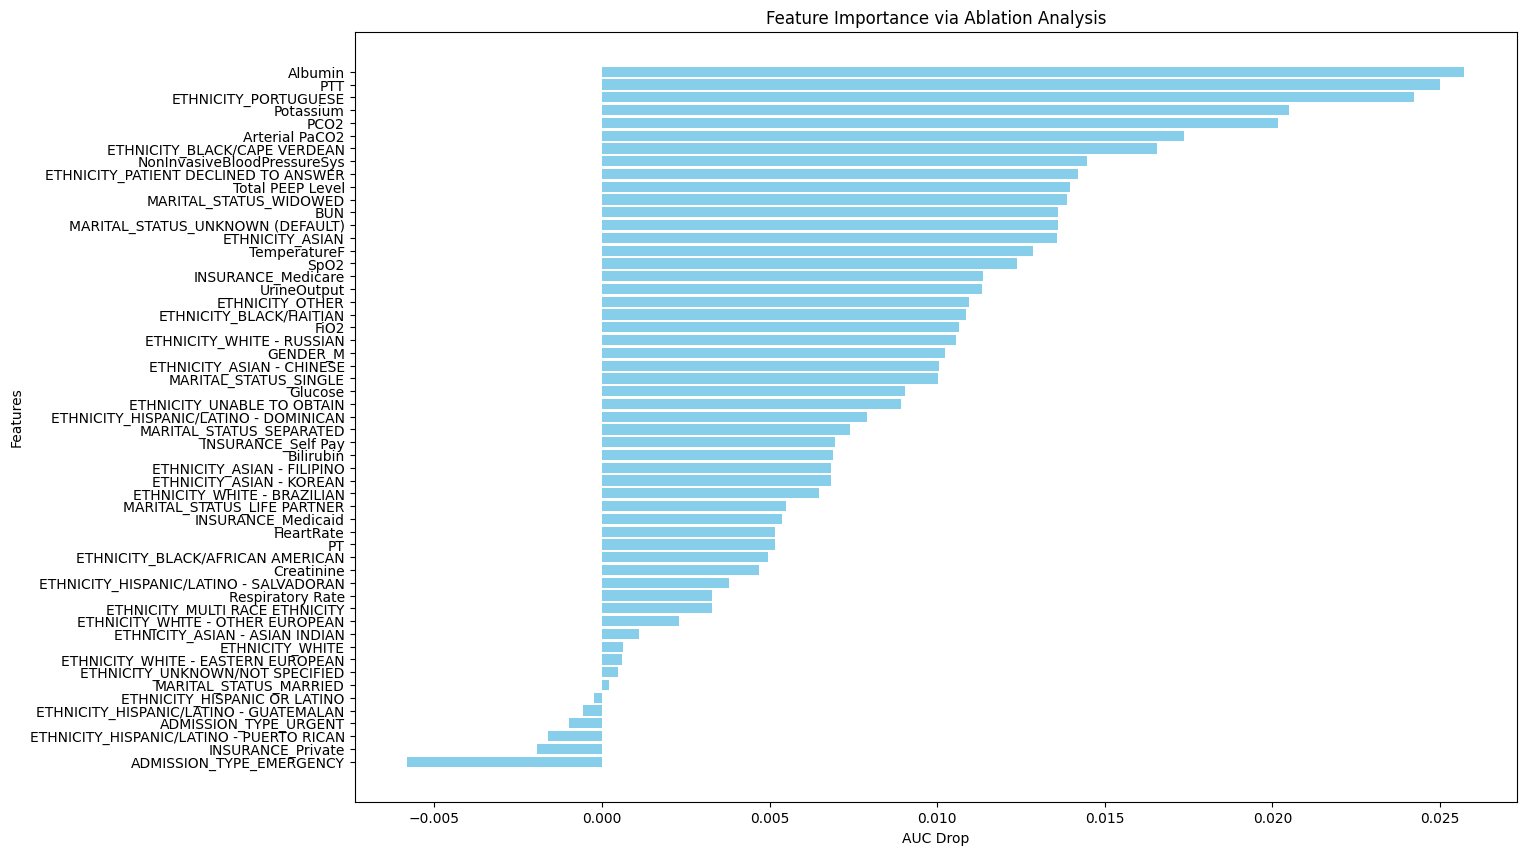

In [ ]:
import matplotlib.pyplot as plt

features = [item[0] for item in sorted_features]
auc_drops = [item[1]['AUC Drop'] for item in sorted_features]

plt.figure(figsize=(15, 10))
plt.barh(features, auc_drops, color='skyblue')
plt.xlabel('AUC Drop')
plt.ylabel('Features')
plt.title('Feature Importance via Ablation Analysis')
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top
plt.show()


model cnn


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the CNN model
model_cnn = Sequential([
    Conv1D(64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    Conv1D(32, kernel_size=3, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Flatten(),  # Flatten the output of convolutional layers

    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the CNN model
model_cnn.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'auc']
)

# Summary of the CNN model
model_cnn.summary()


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_60"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                      │ (None, 53, 64)              │             256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_292              │ (None, 53, 64)              │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_292 (Dropout)                │ (None, 53, 64)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_1 (Conv1D)                    │ (None, 51, 32)              │           6,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_293              │ (None, 51, 32)              │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_293 (Dropout)                │ (None, 51, 32)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 1632)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_347 (Dense)                    │ (None, 128)                 │         209,024 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_294              │ (None, 128)                 │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_294 (Dropout)                │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_348 (Dense)                    │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_295              │ (None, 64)                  │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_295 (Dropout)                │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_349 (Dense)                    │ (None, 1)                   │              65 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 224,929 (878.63 KB)

 Trainable params: 224,353 (876.38 KB)

 Non-trainable params: 576 (2.25 KB)

In [ ]:
# Train the model with NumPy arrays
history = model_cnn.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - accuracy: 0.5541 - auc: 0.5713 - loss: 0.8231 - val_accuracy: 0.5975 - val_auc: 0.7068 - val_loss: 0.6502
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6393 - auc: 0.6812 - loss: 0.6796 - val_accuracy: 0.6335 - val_auc: 0.7138 - val_loss: 0.6324
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6640 - auc: 0.7040 - loss: 0.6334 - val_accuracy: 0.6777 - val_auc: 0.7233 - val_loss: 0.6146
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7010 - auc: 0.7365 - loss: 0.5975 - val_accuracy: 0.6902 - val_auc: 0.7394 - val_loss: 0.5964
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6929 - auc: 0.7491 - loss: 0.5887 - val_accuracy: 0.7317 - val_auc: 0.7704 - val_loss: 0.5622
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6965 - auc: 0.7634 - loss: 0.5593 - val_accuracy: 0.7704 - val_auc: 0.8193 - val_loss: 0.5092
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_probs = model_cnn.predict(X_test).ravel()


23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)


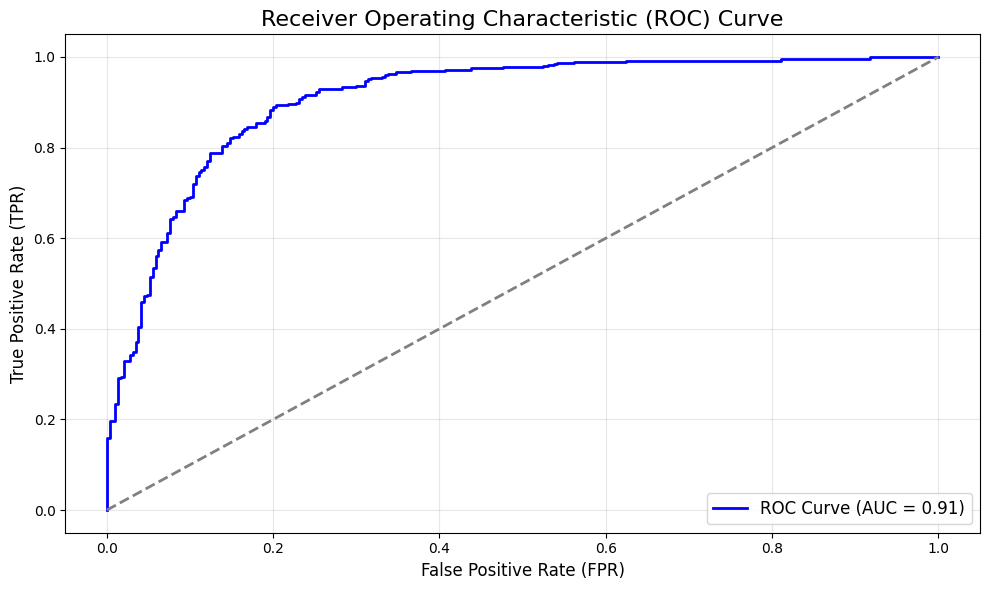

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


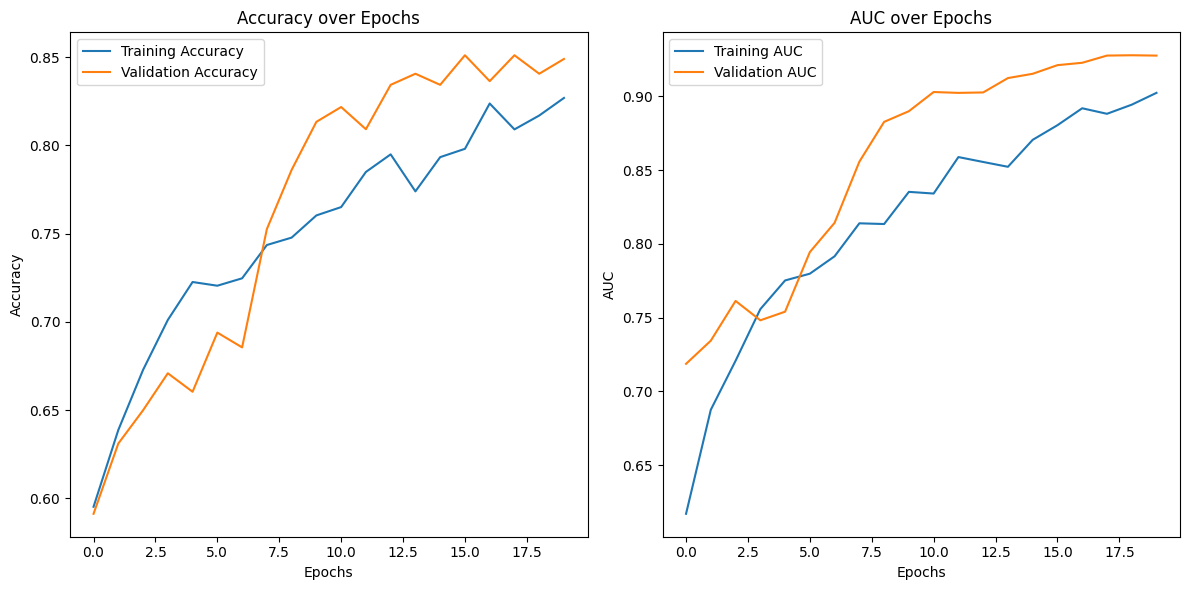

In [ ]:
import matplotlib.pyplot as plt

# Assuming 'history' contains the training history from model.fit()

# Plot Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# AUC Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['auc'], label='Training AUC')
plt.plot(history.history['val_auc'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()


model rnn

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam

# Define the RNN model
model_rnn = Sequential([
    LSTM(128, return_sequences=True, input_shape=(X_train.shape[1], 1)),
    BatchNormalization(),
    Dropout(0.3),

    LSTM(64, return_sequences=False),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the RNN model
model_rnn.compile(
    optimizer=Adam(learning_rate=0.0005),
    loss='binary_crossentropy',
    metrics=['accuracy', 'AUC']
)




/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
history = model_rnn.fit(
    X_train,
    y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32
)

Epoch 1/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 14s 80ms/step - AUC: 0.4882 - accuracy: 0.5050 - loss: 0.8594 - val_AUC: 0.5126 - val_accuracy: 0.5989 - val_loss: 0.6733
Epoch 2/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - AUC: 0.5072 - accuracy: 0.5311 - loss: 0.7669 - val_AUC: 0.4648 - val_accuracy: 0.5989 - val_loss: 0.6760
Epoch 3/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - AUC: 0.5027 - accuracy: 0.5521 - loss: 0.7595 - val_AUC: 0.4902 - val_accuracy: 0.5989 - val_loss: 0.6860
Epoch 4/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - AUC: 0.5055 - accuracy: 0.5442 - loss: 0.7407 - val_AUC: 0.5254 - val_accuracy: 0.5989 - val_loss: 0.6954
Epoch 5/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 6s 71ms/step - AUC: 0.5450 - accuracy: 0.5822 - loss: 0.7076 - val_AUC: 0.4892 - val_accuracy: 0.5989 - val_loss: 0.6840
Epoch 6/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 75ms/step - AUC: 0.5327 - accuracy: 0.5706 - loss: 0.7064 - val_AUC: 0.5308 - val_accuracy: 0.5989 - val_loss: 0.7043
Epoch 7/20
91/91 ━━━━━━━━━━━━━━━━━━━━ 7s 77ms

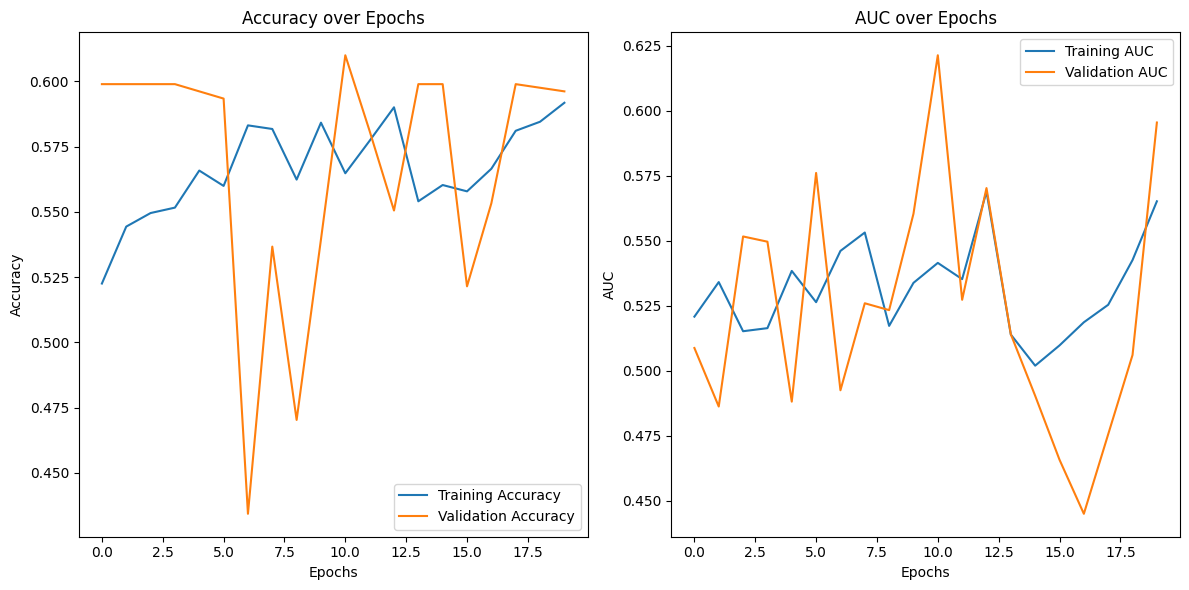

In [ ]:
# Plot Accuracy
plt.figure(figsize=(12, 6))

# Accuracy Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# AUC Plot
plt.subplot(1, 2, 2)
plt.plot(history.history['AUC'], label='Training AUC')
plt.plot(history.history['val_AUC'], label='Validation AUC')
plt.title('AUC over Epochs')
plt.xlabel('Epochs')
plt.ylabel('AUC')
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
from sklearn.metrics import roc_curve, auc

# Get predicted probabilities
y_pred_probs = model_rnn.predict(X_test).ravel()

23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probs)
roc_auc = auc(fpr, tpr)


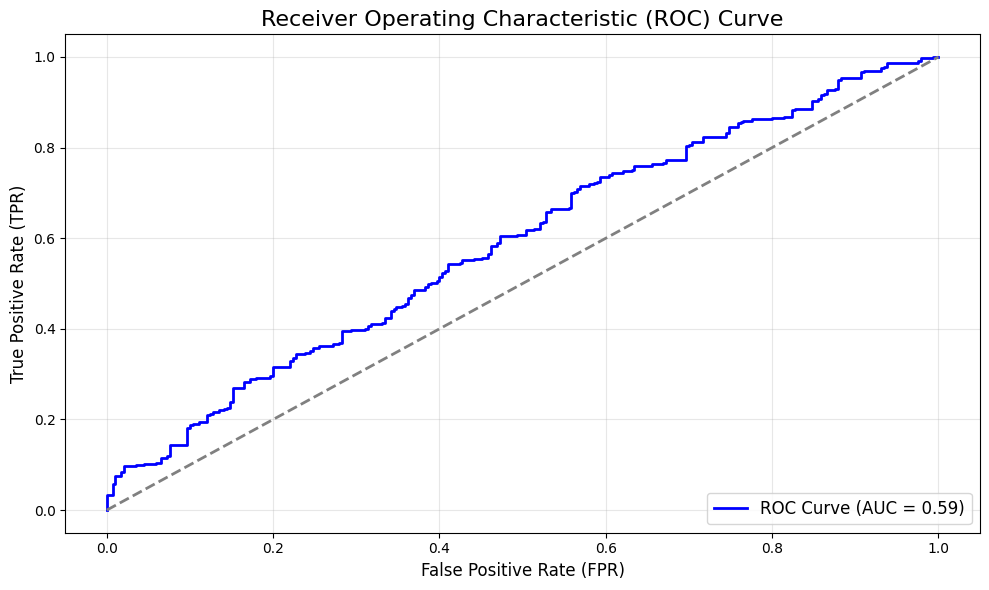

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Diagonal line
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=16)
plt.xlabel('False Positive Rate (FPR)', fontsize=12)
plt.ylabel('True Positive Rate (TPR)', fontsize=12)
plt.legend(loc='lower right', fontsize=12)
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

# 新增區段